# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


# Загрузка Датасета

In [2]:
data = pd.read_csv(
    '../../DATA/Split/Число ночевок в гостиницах и ананлогичных средствах размещения.csv').drop('Unnamed: 0', axis=1)


In [3]:
data.columns.to_numpy().shape

(15,)

# Графики "Коробка с усами"

In [4]:
data = data.apply(lambda s: s.map(lambda a: float(a.replace(',', '.')) if type(a) is str else a))
names = data.columns.to_numpy()[1:]


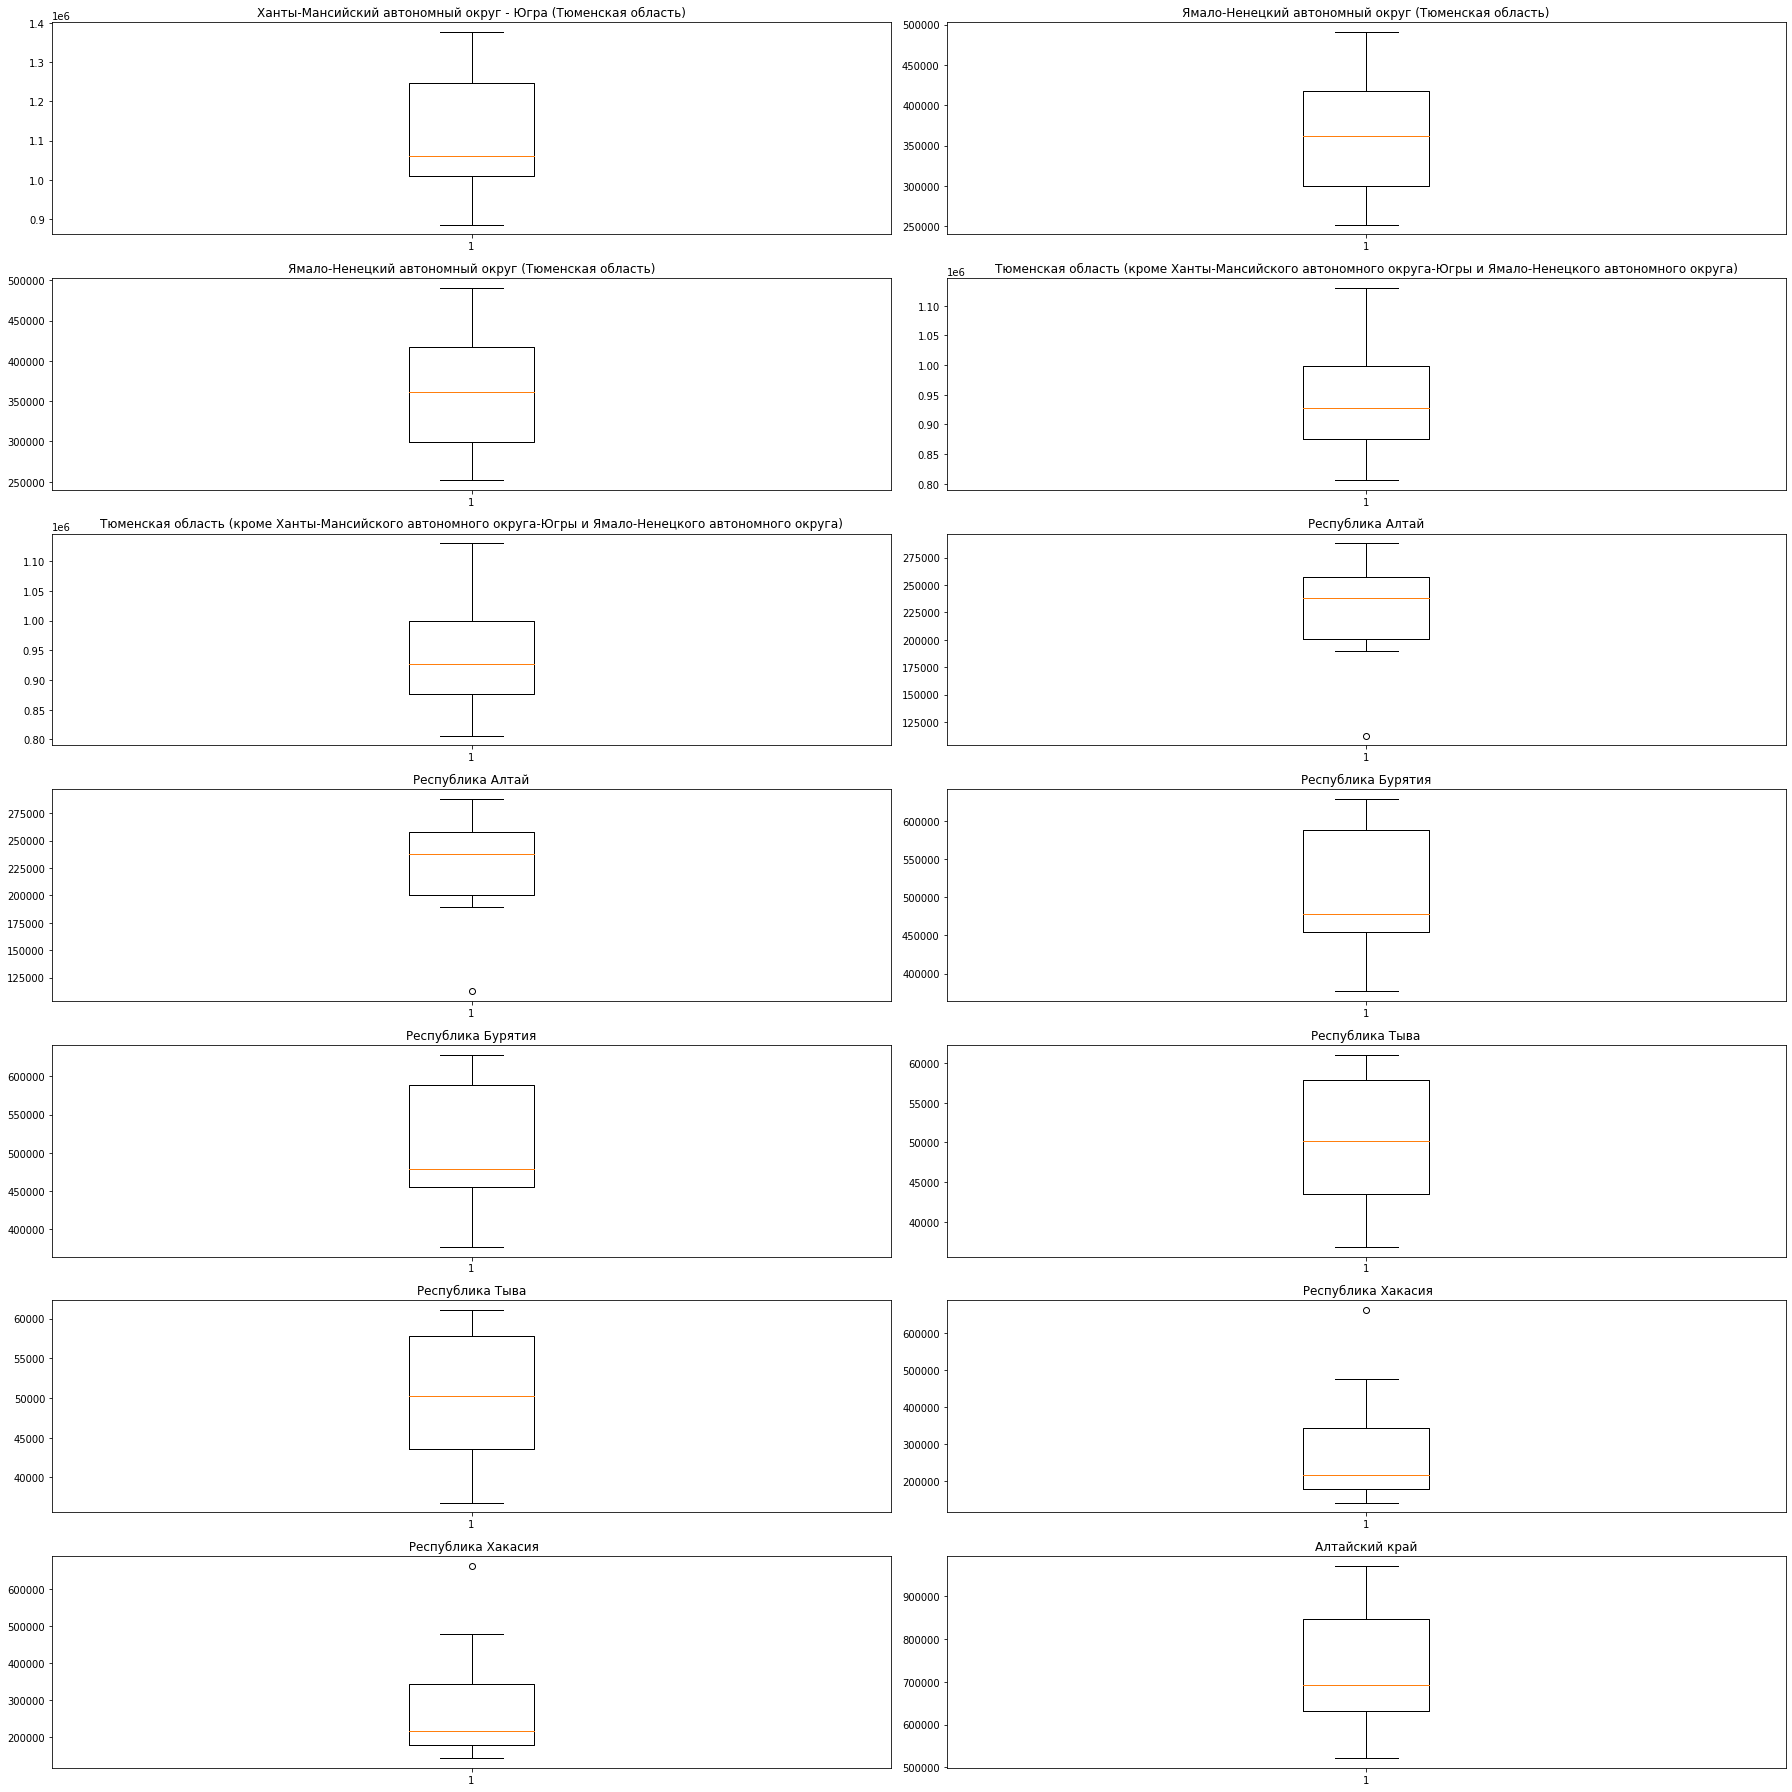

In [5]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data[names[i+j]].dropna())
        ax.set_title(names[i+j])
        
